<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/NN1_BackPropogation_MNIST_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def sigmoid(z):

  return 1 / (1+np.exp(-z))

In [46]:
class NeuralNetwork():

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

    self.W2 = np.random.randn(input_nodes, hidden_nodes) / np.sqrt(input_nodes / 2)
    self.b2 = np.random.rand(hidden_nodes)

    self.W3 = np.random.randn(hidden_nodes, output_nodes) / np.sqrt(hidden_nodes / 2)
    self.b3 = np.random.rand(output_nodes)

    self.learning_rate = learning_rate

  def feed_forward(self):

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    return (np.sum((self.target_data - self.a3)**2)) / (len(self.input_data))

  def loss_val(self):

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    return (np.sum((self.target_data - self.a3)**2)) / len(self.input_data)


  def accuracy(self, test_input_data, test_target_data):

    matched_list = []
    unmatched_list = []

    for i in range(len(test_input_data)):

      label = test_target_data[i]

      data = test_input_data[i] / 255.0 * 0.99 + 0.01
      predicted_num = self.predict(np.array(data, ndmin = 2))

      if predicted_num == label:
        matched_list.append(i)
      
      else:
        unmatched_list.append(i)

    accuracy_val = len(matched_list) / len(test_input_data)

    return accuracy_val, unmatched_list

  def train(self, input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    loss_val = self.feed_forward()

    loss_3 = (self.a3 - self.target_data) * self.a3 * (1 - self.a3)
    loss_2 = np.dot(loss_3, self.W3.T) * self.a2 * (1 - self.a2)

    self.W3 = self.W3 - self.learning_rate * np.dot(self.a2.T, loss_3)
    self.b3 = self.b3 - self.learning_rate * loss_3

    self.W2 = self.W2 - self.learning_rate * np.dot(self.a1.T, loss_2)
    self.b2 = self.b2 - self.learning_rate * loss_2

  def predict(self,input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    a3 = sigmoid(z3)

    predicted_num = np.argmax(a3)

    return predicted_num

In [44]:
training_data = np.loadtxt("./drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_train.csv",delimiter=',',dtype=np.float32)

print("training_data.shape = ",training_data.shape)

training_data.shape =  (60000, 785)


In [48]:
#hyper_parameter

i_nodes = training_data.shape[1] - 1
h_nodes = 100
o_nodes = 10
lr = 0.1
epochs = 1

loss_val_list = []

nn = NeuralNetwork(i_nodes, h_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
  for step in range(len(training_data)):

    input_data = training_data[step, 1: ] / 255.0 * 0.99 + 0.01

    target_data = np.zeros(o_nodes) + 0.01
    target_data[int(training_data[step,0])] = 0.99

    nn.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))

    if step % 1000 == 0:
      print("step = ",step, ", current loss value = ", nn.loss_val())

    loss_val_list.append(nn.loss_val())

end_time = datetime.now()
print("\n Elapsed time ->",end_time - start_time)

step =  0 , current loss value =  1.907299356521198
step =  1000 , current loss value =  0.22088243350884895
step =  2000 , current loss value =  0.34287635389869775
step =  3000 , current loss value =  0.5789150565062239
step =  4000 , current loss value =  0.10700763741879821
step =  5000 , current loss value =  0.05853018082461123
step =  6000 , current loss value =  0.0034877113705317838
step =  7000 , current loss value =  0.3962260316515088
step =  8000 , current loss value =  0.000485429937557924
step =  9000 , current loss value =  0.03175027154517459
step =  10000 , current loss value =  0.0005129615778677009
step =  11000 , current loss value =  0.0029057569117688963
step =  12000 , current loss value =  0.03061637012513992
step =  13000 , current loss value =  0.03619215136148084
step =  14000 , current loss value =  0.0036160842069004294
step =  15000 , current loss value =  0.012265218861832312
step =  16000 , current loss value =  0.0004379022467191108
step =  17000 , cur

In [50]:
test_data = np.loadtxt("./drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_test.csv", delimiter=',', dtype=np.float32)

print("test_data.shape = ",test_data.shape)

test_data.shape =  (10000, 785)


In [53]:
test_input_data = test_data[:, 1: ]
test_target_data = test_data[:, 0]

(acc_ret, false_list) = nn.accuracy(test_input_data, test_target_data)

print("Accuracy ret = ",np.round(100*acc_ret,3),'%') 

Accuracy ret =  93.37 %


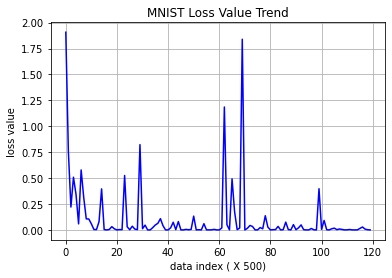

In [54]:
Y_DATA_LIST = []

for i in range (0, len(loss_val_list), 500):
  Y_DATA_LIST.append(loss_val_list[i])

plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()

In [55]:
max_loss = np.max(loss_val_list)
max_loss_index = np.argmax(loss_val_list)

min_loss = np.min(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss, ", max_loss_index = ",max_loss_index,", min_loss = ",min_loss,", min_loss_index = ",min_loss_index)

max_loss =  2.325591283389188 , max_loss_index =  29434 , min_loss =  0.0002732282483359007 , min_loss_index =  5473


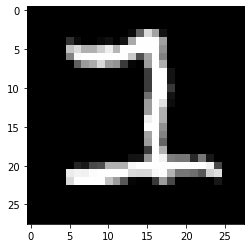

label =  1.0


In [56]:
img = training_data[max_loss_index, 1: ].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

print("label = ",training_data[max_loss_index,0])

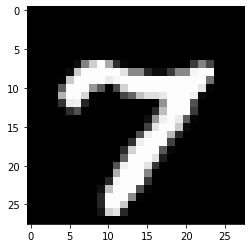

label =  7.0


In [57]:
img = training_data[min_loss_index,1: ].reshape(28,28)

plt.imshow(img ,cmap='gray')
plt.show()

print("label = ",training_data[min_loss_index,0])